# Decision Tree Classfication

Step 1 - Data Ingestion

You are working at a pharmaceutical company as data a datascientist. Your goal is to predict right medicine dependfing on conditions of patients

In [40]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [41]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

# Above is a multiclass classification problem

Step 2 - Basic Data quality checks

In [42]:
df.shape

(200, 6)

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [46]:
df.select_dtypes(include="object").nunique()

Sex            2
BP             3
Cholesterol    2
Drug           5
dtype: int64


Step 3 - Seperate X and Y(Drug)

In [47]:
X = df.drop(columns = ["Drug"])
Y = df["Drug"]

In [48]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [49]:
Y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

Step 4 - Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.4, random_state=42)

In [51]:
xtrain.shape

(120, 5)

In [52]:
xtest.shape

(80, 5)

In [53]:
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
2,47,M,LOW,HIGH,10.114
77,26,F,HIGH,NORMAL,19.161
46,37,F,HIGH,HIGH,13.091
187,47,M,HIGH,HIGH,10.403
191,23,M,HIGH,HIGH,8.011


In [54]:
ytrain.head()

2      drugC
77     DrugY
46     drugA
187    drugA
191    drugA
Name: Drug, dtype: object

In [55]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,M,LOW,NORMAL,11.424
15,16,F,HIGH,NORMAL,15.516
30,18,F,NORMAL,NORMAL,8.750
158,59,F,LOW,HIGH,10.444
128,47,M,LOW,NORMAL,33.542


In [56]:
ytest.head()

95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
Name: Drug, dtype: object

Step 5 - Preprocess the data

In [57]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [58]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['Sex', 'BP', 'Cholesterol']

In [59]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['Age', 'Na_to_K']

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


In [62]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [63]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [64]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [65]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
2,0.117624,-0.884625,1.0,1.0,0.0,0.0
77,-1.165548,0.420766,0.0,0.0,0.0,1.0
46,-0.493410,-0.455074,0.0,0.0,0.0,0.0
187,0.117624,-0.842925,1.0,0.0,0.0,0.0
191,-1.348858,-1.188066,1.0,0.0,0.0,0.0


In [66]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
95,-0.554514,-0.695605,1.0,1.0,0.0,1.0
15,-1.776582,-0.105171,0.0,0.0,0.0,1.0
30,-1.654375,-1.081436,0.0,0.0,1.0,1.0
158,0.850865,-0.837009,0.0,1.0,0.0,0.0
128,0.117624,2.495800,1.0,1.0,0.0,1.0


# Step 6 - Build the decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    max_depth=1,
    min_samples_leaf=5,
    min_samples_split =5,
    criterion="entropy",
    random_state=42
)
dtc.fit(xtrain_pre, ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
dtc.score(xtrain_pre, ytrain)

0.725

In [69]:
dtc.score(xtest_pre, ytest)

0.725

# This model is not performing good here apply Hyperparameter tuning

In [70]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}

model = DecisionTreeClassifier(random_state=42)

rscv = RandomizedSearchCV(model, params, cv=5, scoring="f1_macro", random_state=42)
rscv.fit(xtrain_pre, ytrain)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [71]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_depth': 9,
 'criterion': 'entropy'}

In [72]:
rscv.best_score_

np.float64(0.980952380952381)

In [73]:
best_dtc = rscv.best_estimator_
best_dtc

,criterion,'entropy'
,splitter,'best'
,max_depth,9
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [74]:
best_dtc.score(xtrain_pre, ytrain)
1.0

1.0

In [75]:
best_dtc.score(xtest_pre, ytest)

1.0

# Evaluate the model

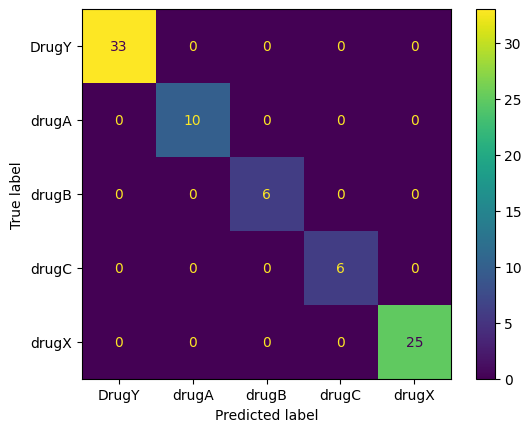

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtest_pre, ytest)

In [77]:
from sklearn.metrics import classification_report

ypred_test = best_dtc.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        33
       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# From above it is clear that this is a good model

# Plotting the decision tree

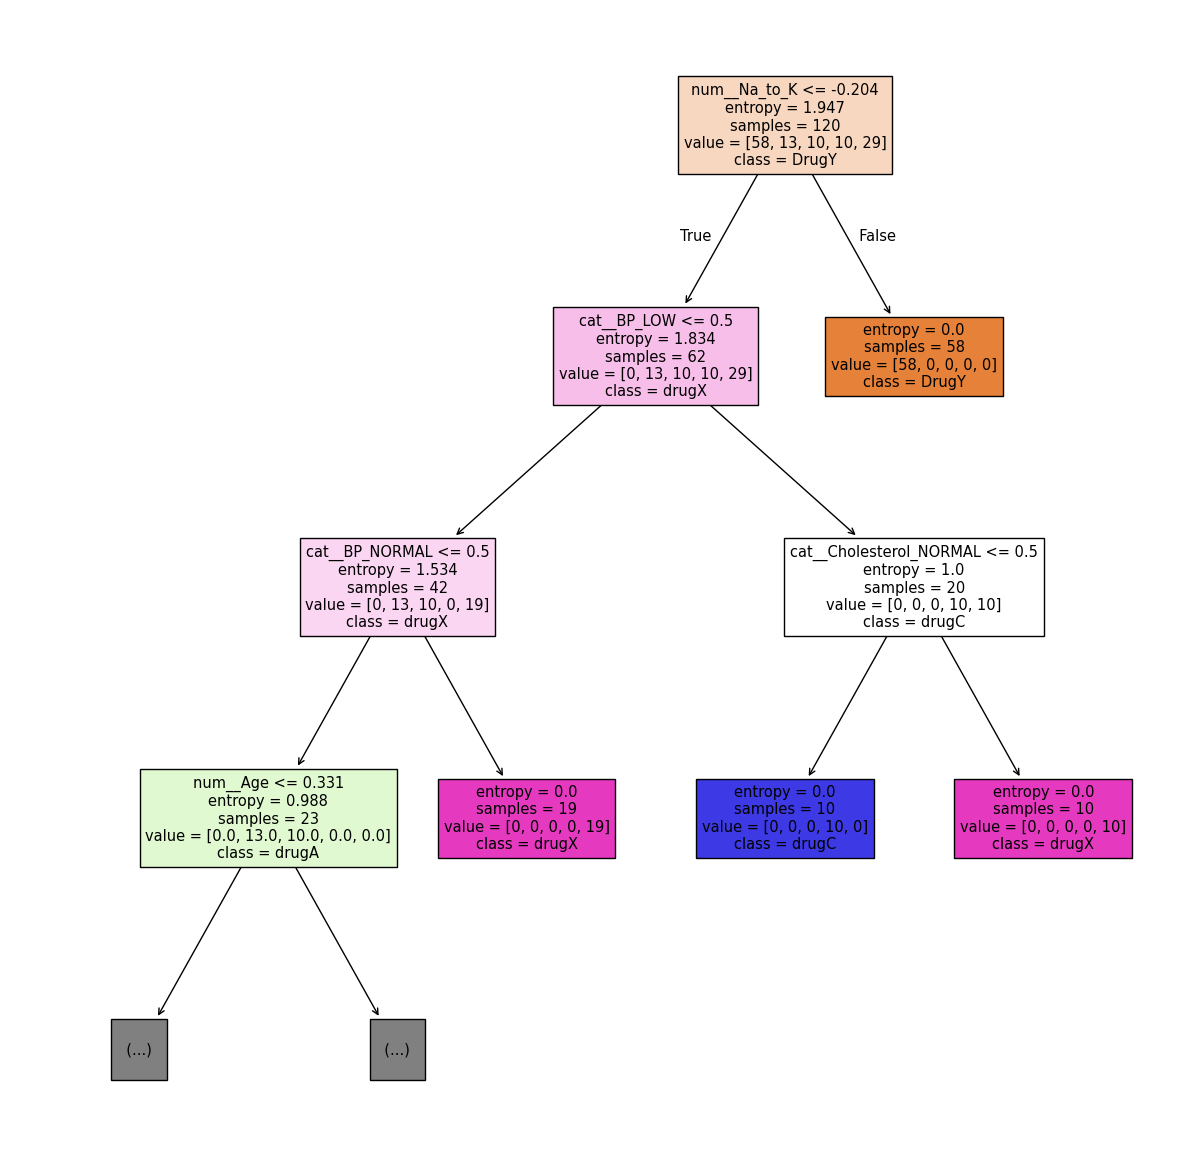

In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(
    best_dtc, 
    max_depth=3, 
    class_names=best_dtc.classes_, 
    feature_names=xtrain_pre.columns, 
    filled=True
)
plt.show()


# Show feature importances

In [79]:
best_dtc.feature_importances_

array([0.0972312 , 0.5132028 , 0.        , 0.12537644, 0.17858713,
       0.08560242])

In [80]:
xtrain_pre.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_M', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_NORMAL'],
      dtype='object')

In [81]:
imp = pd.Series(
    best_dtc.feature_importances_,
    index= xtrain_pre.columns
)
imp

num__Age                   0.097231
num__Na_to_K               0.513203
cat__Sex_M                 0.000000
cat__BP_LOW                0.125376
cat__BP_NORMAL             0.178587
cat__Cholesterol_NORMAL    0.085602
dtype: float64

In [82]:
imp.sort_values()

cat__Sex_M                 0.000000
cat__Cholesterol_NORMAL    0.085602
num__Age                   0.097231
cat__BP_LOW                0.125376
cat__BP_NORMAL             0.178587
num__Na_to_K               0.513203
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

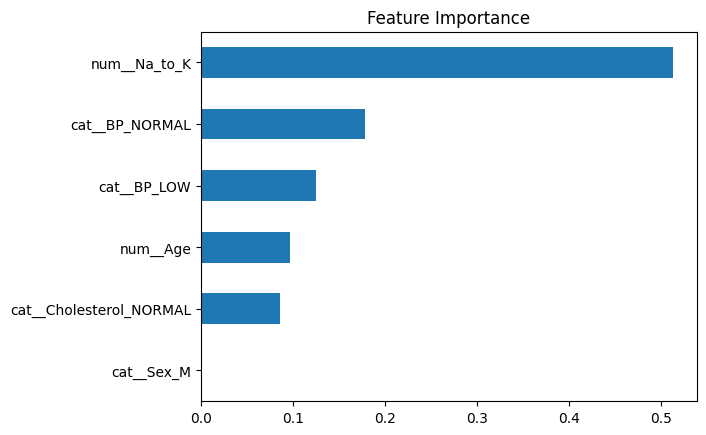

In [83]:
imp.sort_values().plot(kind="barh", title="Feature Importance")

# Out of Sample prediction

In [85]:
xnew = pd.read_csv("drugtest.csv")
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,37.0,F,HIGH,HIGH,13.091
1,NaN,F,HIGH,HIGH,12.894
2,23.0,M,NaN,HIGH,31.686
3,31.0,M,HIGH,HIGH,30.366
4,39.0,M,HIGH,HIGH,9.664
5,16.0,M,LOW,HIGH,12.006
6,33.0,F,LOW,HIGH,NaN
7,59.0,M,HIGH,HIGH,NaN
8,68.0,M,LOW,HIGH,10.291
9,30.0,F,NORMAL,HIGH,10.443


In [86]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [87]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-0.493410,-0.455074,0.0,0.0,0.0,0.0
1,0.087072,-0.483499,0.0,0.0,0.0,0.0
2,-1.348858,2.227998,1.0,0.0,0.0,0.0
3,-0.860031,2.037535,1.0,0.0,0.0,0.0
4,-0.371203,-0.949555,1.0,0.0,0.0,0.0
5,-1.776582,-0.611628,1.0,1.0,0.0,0.0
6,-0.737824,-0.298735,0.0,1.0,0.0,0.0
7,0.850865,-0.298735,1.0,0.0,0.0,0.0
8,1.400796,-0.859085,1.0,1.0,0.0,0.0
9,-0.921134,-0.837153,0.0,0.0,1.0,0.0


In [88]:
preds = best_dtc.predict(xnew_pre)
preds

array(['drugA', 'drugA', 'DrugY', 'DrugY', 'drugA', 'drugC', 'drugC',
       'drugB', 'drugC', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugX', 'drugA', 'drugC', 'DrugY', 'drugC',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugC'], dtype=object)

In [89]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [90]:
xnew["drug"] = preds
xnew[best_dtc.classes_] = probs.round(4)
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,drug,DrugY,drugA,drugB,drugC,drugX
0,37.0,F,HIGH,HIGH,13.091,drugA,0.0,1.0,0.0,0.0,0.0
1,NaN,F,HIGH,HIGH,12.894,drugA,0.0,1.0,0.0,0.0,0.0
2,23.0,M,NaN,HIGH,31.686,DrugY,1.0,0.0,0.0,0.0,0.0
3,31.0,M,HIGH,HIGH,30.366,DrugY,1.0,0.0,0.0,0.0,0.0
4,39.0,M,HIGH,HIGH,9.664,drugA,0.0,1.0,0.0,0.0,0.0
5,16.0,M,LOW,HIGH,12.006,drugC,0.0,0.0,0.0,1.0,0.0
6,33.0,F,LOW,HIGH,NaN,drugC,0.0,0.0,0.0,1.0,0.0
7,59.0,M,HIGH,HIGH,NaN,drugB,0.0,0.0,1.0,0.0,0.0
8,68.0,M,LOW,HIGH,10.291,drugC,0.0,0.0,0.0,1.0,0.0
9,30.0,F,NORMAL,HIGH,10.443,drugX,0.0,0.0,0.0,0.0,1.0


In [91]:
xnew["drug"].value_counts()

drug
DrugY    24
drugX    11
drugA     7
drugC     7
drugB     1
Name: count, dtype: int64

<Axes: xlabel='drug'>

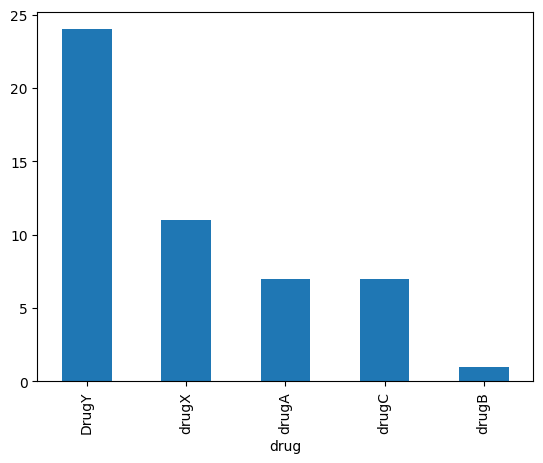

In [92]:
xnew["drug"].value_counts().plot(kind="bar")

# Save the preprocessor, model into joblib file

In [93]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [94]:
joblib.dump(best_dtc, "model.joblib")

['model.joblib']

In [95]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [96]:
m = joblib.load("model.joblib")
m

,criterion,'entropy'
,splitter,'best'
,max_depth,9
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [97]:
m.score(xtest_pre, ytest)

1.0